In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

Assignment 1 by Josefin Kokkinakis and Eli Uhlin, group 30.
We have both worked around 15 hours each.

In [253]:
X = pd.read_csv('data_assignment3.csv')
phi = X['phi']
psi = X['psi']

1. a)

Text(0.5, 0, 'Psi')

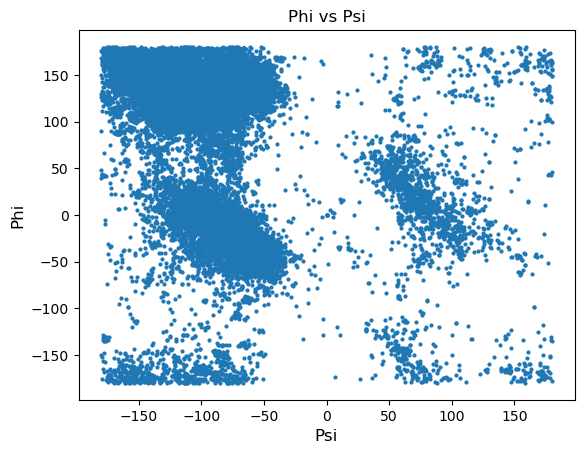

In [254]:
plt.scatter(phi,psi,s=4)
plt.title('Phi vs Psi')
plt.ylabel('Phi', fontsize=12)
plt.xlabel('Psi', fontsize=12)

1. b)

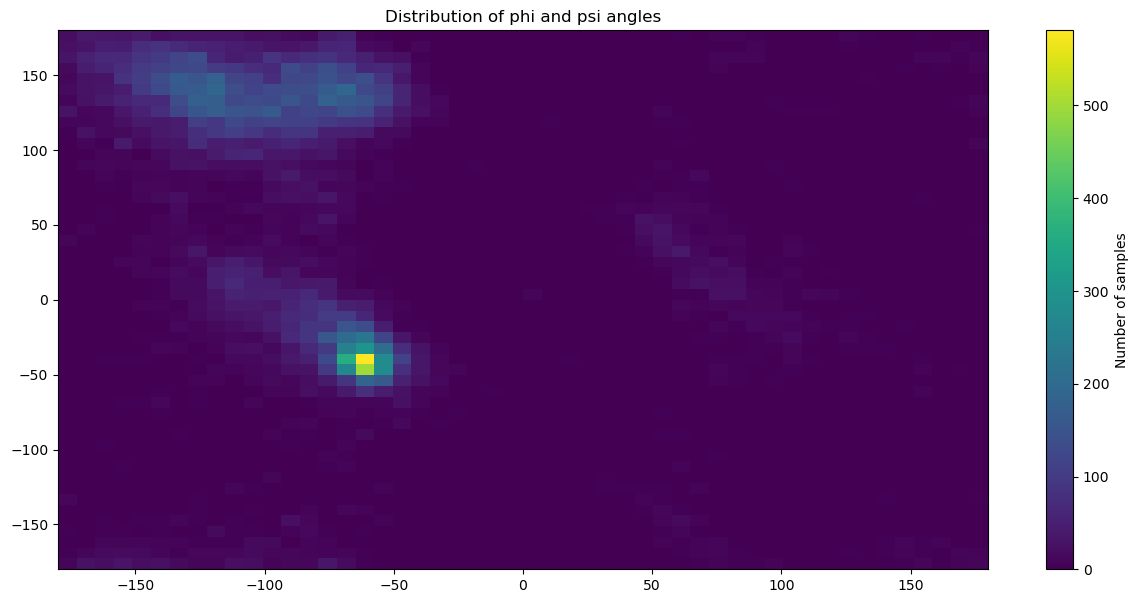

In [255]:
plt.figure(figsize=(15, 7))

plt.hist2d(phi,psi,bins=50,cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')
#dubbelkolla namn på denna

# Add title and labels to plot.

plt.title('Distribution of phi and psi angles')

# Show the
plt.show()

1. c)
In order to transform the data, we quadrupled  
To make the ramachandran plot we duplicated the data and added 360 degrees to phi. We did the same for phi. This gave us 4 quadrants. We tried to find a spot where the edges were relatively empty (without data points). We then limited the view of the plot to roughly the center of the 4 quadrats.

In [256]:
#transforming the data
xPhi = phi.tolist()
xPsi = psi.tolist()
phiPlus = X['phi'].tolist()
psiPlus = X['psi'].tolist()
res = X['residue name'].tolist()
pos = X['position'].tolist()
chain = X['chain'].tolist()

for i in range(len(phiPlus)):
    phiPlus[i] += 360
    psiPlus[i] += 360

topLeftDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phi, 'psi': psiPlus})
topRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psiPlus})

bottomRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psi})
bottomLeftDF = X

X4 = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')


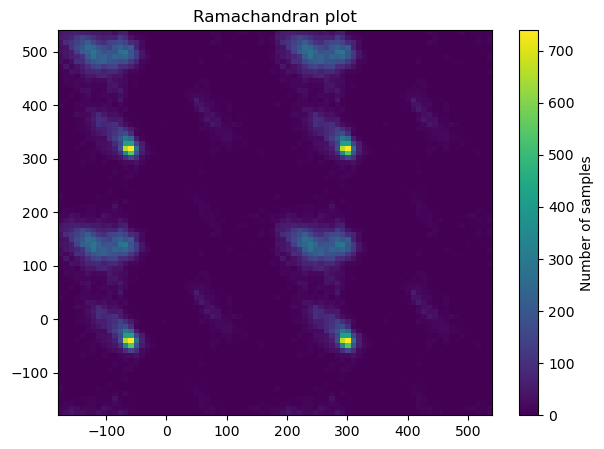

In [257]:
#The entire ramachandran plot, with all four quadrants

# Set size of the figure
plt.figure(figsize=(7,5))
# Plot 2D histogram from X
# We can chose the colormaps viridis.
plt.hist2d(X4['phi'], X4['psi'], bins=80, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Ramachandran plot')

# Show the plot.

plt.show()

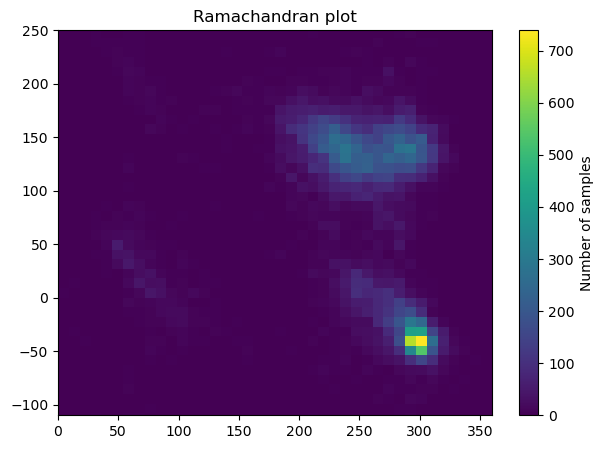

In [258]:
#ramachandran plot with limited view

# Set size of the figure
plt.figure(figsize=(7,5))
# Plot 2D histogram from X
# We can chose the colormaps viridis.
plt.hist2d(X4['phi'], X4['psi'], bins=80, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Ramachandran plot')

# Show the plot.
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

2. a) 
To evaluate which value of K that gives us the best clustering we used the Elbow method. Where the steepest drop off would indicate the best k-value.
Our elbow graph indicates that k=2 is the preferred k-value. In our code this would mean k*4 since we have 4 quadrants. 8 clusters would then be the preferred number in the large merged graph which is equivalent to 2 clusters in the graph plotted further down.

In [232]:
del X4['residue name']
del X4['position']
del X4['chain']

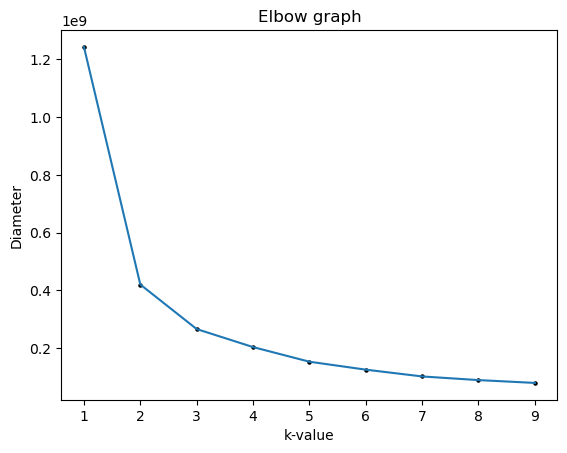

In [233]:
#Plot Elbow graph

k_values = range (1,10)
tot_diam=[]

# Perform K-Means clustering    
# Specify the number of k and fit the data X
# k*4 because we have 4 quadrants
for k in k_values:
    kmeans = KMeans(n_clusters=k*4, random_state=4, n_init=10).fit(X4)
    tot_diam.append(kmeans.inertia_)

plt.title("Elbow graph")
plt.ylabel("Diameter")
plt.xlabel("k-value")
plt.scatter(k_values, tot_diam, c='k', s=5)
plt.plot(k_values, tot_diam)
plt.show()

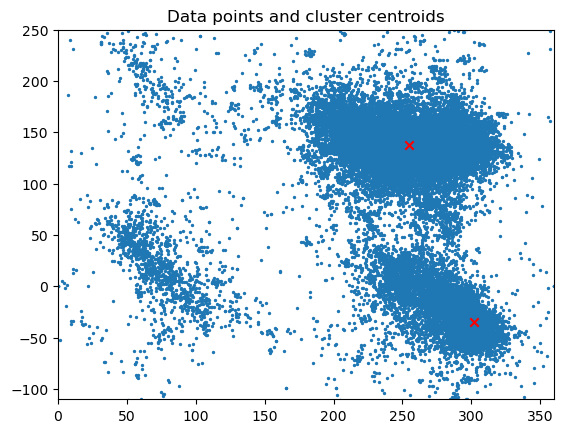

In [234]:
#Plotting the k that is recommended from the Elbow graph
#Plotting the cluster centers and the data points
kmeans = KMeans(n_clusters=8, random_state=4,n_init=28).fit(X4)
plt.scatter(X4['phi'], X4['psi'], s=2)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

2. b)
Evaluation of the k-method:
We can see that using this method there are two clusters on the left side of the graph that are not taken into consideration. We can include these clusters by increasing the value of k, but this will lead to the two big clusters on the right side being divided into smaller circular clusters, which is not ideal either. The k-means method of classification is bad at characterizing non-spherical clusters, which makes it sub-optimal for this specific dataset.
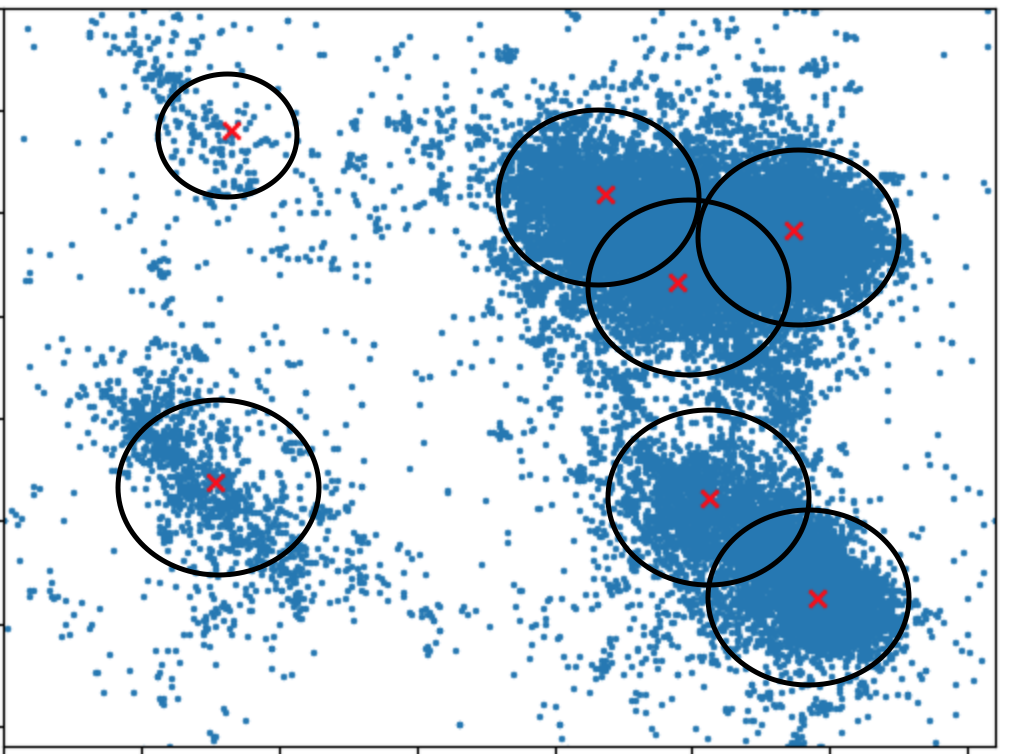

3. a) 

I)
Since we have a very large dataset we thought that the minimum number of samples in the neighborhood for a point to be considered as a core point should be around 100. After we had calculated epsilon we chose to manually try different values for min_samples until we found a value we believed was visually satisfying. Thus we ended up with min_samples=115.

II)
To calculate the maximum distance between two samples belonging to the same neighborhood we used a k-distance graph. After we plotted the graph we limited the x- and y-axis according to where we believed the slope to be the steepest. We believe that the steepest point has a y-coordinate that is approximately 13.5. Thus we chose eps=13.5

See computations in 3b).


3. b)

In [235]:
# Compute DBSCAN
db = DBSCAN(eps=13.5, min_samples=115).fit(X4)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=13.5, min_samples=115)
Estimated number of clusters: 18
Estimated number of noise points: 7065


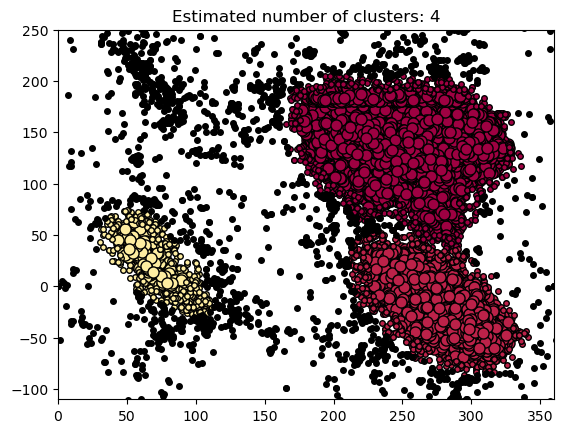

In [236]:
# Plot result
# Black removed and is used for noise instead.

X4=X4.to_numpy()

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X4[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='black', markersize=8)

    xy = X4[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='black', markersize=4)

plt.title('Estimated number of clusters: %d' % (n_clusters_//4))
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

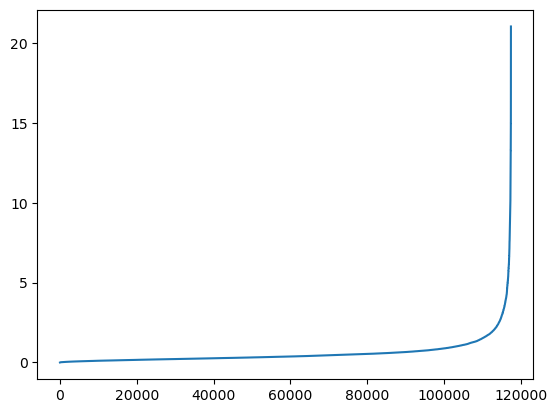

In [237]:
#k-distance graph
neighbors = NearestNeighbors(n_neighbors=80)
neighbors_fit = neighbors.fit(X4)
distances, indices = neighbors_fit.kneighbors(X4)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

plt.show()

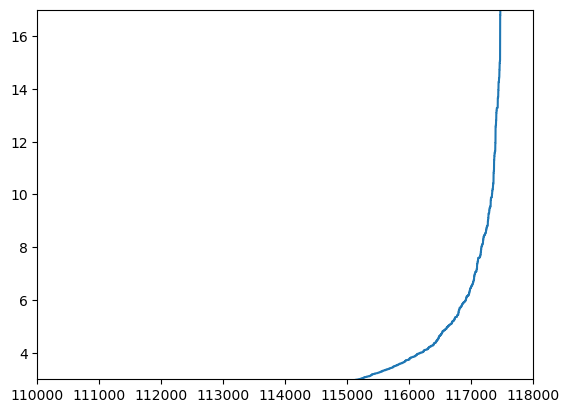

In [238]:
#k-distance graph close-up

neighbors = NearestNeighbors(n_neighbors=80)
neighbors_fit = neighbors.fit(X4)
distances, indices = neighbors_fit.kneighbors(X4)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.xlim([110000, 118000]) 
plt.ylim([3, 17])
plt.show()

3. c)
7065 outliers where found. See calculations and bar chart below.

(-110.0, 250.0)

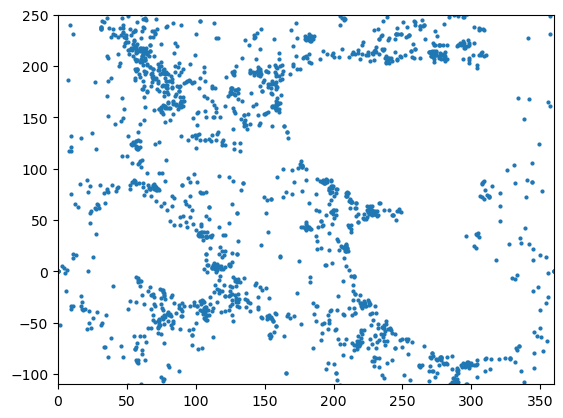

In [239]:
#noise plot

xy = X4[class_member_mask & ~core_samples_mask]

noise =X4[class_member_mask]
plt.scatter(noise[:, 0], noise[:, 1], s=4)

plt.xlim([0, 360]) 
plt.ylim([-110, 250])


In [240]:
xPhi = phi.tolist()
xPsi = psi.tolist()
phiPlus = X['phi'].tolist()
psiPlus = X['psi'].tolist()
res = X['residue name'].tolist()
pos = X['position'].tolist()
chain = X['chain'].tolist()

In [241]:
for i in range(len(phiPlus)):
    phiPlus[i] += 360
    psiPlus[i] += 360

#create dataframes for all four quadrants
topLeftDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phi, 'psi': psiPlus})
topRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psiPlus})

bottomRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psi})
bottomLeftDF = X
# merge all the dataframes
X5 = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')


In [242]:
phi = X5['phi'].tolist()
psi = X5['psi'].tolist()

X5 = X5[(X5['phi'].isin(noise[:, 0])) & (X5['psi'].isin(noise[:,1]))]

In [243]:
X6 = X5[(X5['phi'] <= 360) & (X5['phi'] >= 0)]
X5 = X5[(X5['psi'] <= 240) & (X5['psi'] >= -120)]
  
X5

,residue name,position,chain,phi,psi
104,GLY,115,A,470.288648,-31.537123
231,GLY,115,B,460.758386,-40.349971
242,GLY,126,B,465.934082,2.490071
293,GLU,49,C,228.217863,-70.626214
296,GLY,52,C,185.758648,-41.454436
...,...,...,...,...,...
116914,GLY,172,A,428.435970,184.468839
117155,GLY,52,B,413.190913,216.506909
117275,GLY,172,B,427.653505,180.714774
117313,GLY,210,B,538.587509,190.750988


In [244]:
#amount of outliers
len(noise[:, 0].tolist())

7065

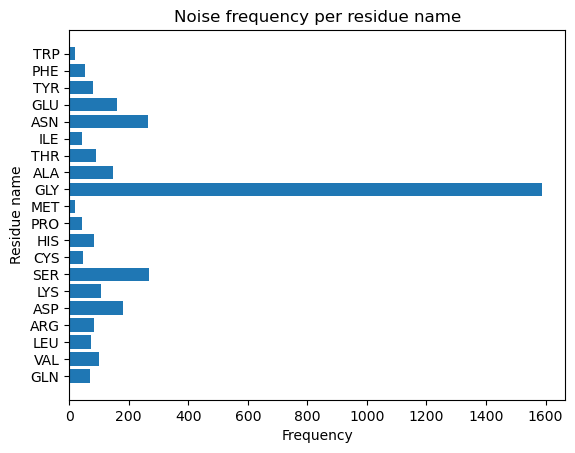

In [245]:
#bar chart of how often (frequency) each of the different 
#amino acid residue types are outliers

res = list(set(X5['residue name']))

freqNoise = []
for r in res:
    freqNoise.append(len(X5[X5['residue name'] == r]))
objects = tuple(res)
y_pos = np.arange(len(objects))
performance = freqNoise
plt.barh(y_pos, performance, align='center', alpha=1, )
plt.yticks(y_pos, objects)
plt.ylabel('Residue name')
plt.xlabel('Frequency')
plt.title('Noise frequency per residue name')

plt.show()

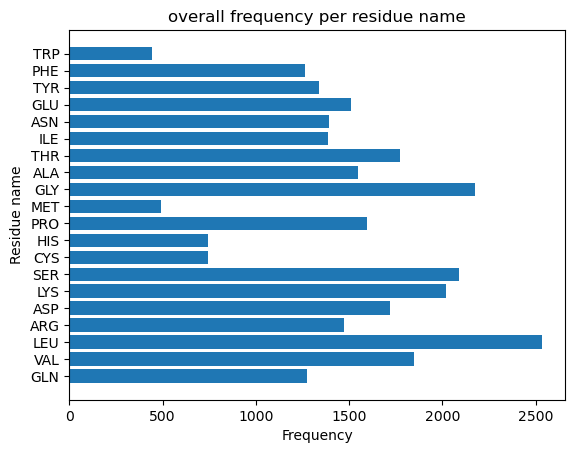

In [246]:
#to get a wider perspective
X = pd.read_csv('data_assignment3.csv')

freqTotal = []
for r in res:
    freqTotal.append(len(X[X['residue name'] == r]))
objects = tuple(res)
y_pos = np.arange(len(objects))
performance = freqTotal
plt.barh(y_pos, performance, align='center', alpha=1, )
plt.yticks(y_pos, objects)
plt.ylabel('Residue name')
plt.xlabel('Frequency')
plt.title('overall frequency per residue name')

plt.show()



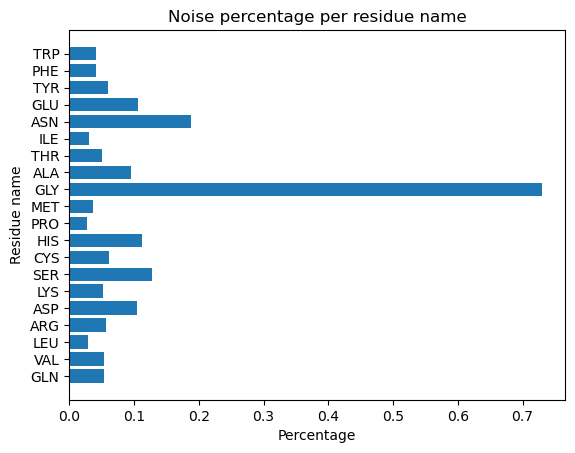

In [247]:
#to get a wider perspective
freqNoiseOverTotal = []
for n,t in zip(freqNoise,freqTotal):
    freqNoiseOverTotal.append(n/t)
objects = tuple(res)
y_pos = np.arange(len(objects))
performance = freqNoiseOverTotal
plt.barh(y_pos, performance, align='center', alpha=1, )
plt.yticks(y_pos, objects)
plt.ylabel('Residue name')
plt.xlabel('Percentage')
plt.title('Noise percentage per residue name')

plt.show()

3. d)
The pros and cons comparing DBSCAN and K-means for clustering:

Pros for DBSCAN:
Good at recognizing clusters regardless of their shape. Does not require that the number of clusters have to be specified. 

It lets us manually decide both hyperparameters. Epsilon lets us decide the max distance between two points (scanning radius). The minpts lets us choose the number of minimum samples in the neighborhood for a point to be considered as a core point. By changing these values based on what how dense we believe the clusters to be and how roughly how far apart points in the clusters are, we can achieve good results (this assumes that all the clusters in the data set have roughly the same density)

This lets us adjust (to a certain degree) both the number of clusters and how many points are required to form a cluster. The latter meant we could decide (to a certain degree) which parts of our plot would be considered as a cluster. 
Has the ability to ignore noisy points.

Cons for DBSCAN:
Requires us to manually find the optimal minimum numbers of samples, which is very time consuming for use. However, 

Sometimes different clusters in the same graph have different density, meaning that it’s sometimes hard to find an optimal minpts-value and epsilon. For example: in the top left corner of our graph we see a sparse but noticeable cluster that is not being recognized by DBSCAN because the minpts-value and/or epsilon is too low. However if we increase the value of minpts-value and/or epsilon the two clusters to the right will be recognized as a single cluster.

Pros for K-means:
Works well for spherical clusters, no assumptions about shape. Does not require training (except for choosing k). Guarantees convergence. 


Cons for K-means:
The number of clusters have to be specified beforehand
Does not work very well for our data, since the clusters we had were not spherical. Very sensitive to noise because all points get assigned to a cluster, if a dataset has a lot of noise this can distort the actual clusters. 

The result depends on the initial value and k-means and can sometimes lead to very different results.

When we used the elbow method for k-means and the k-distance method for DBSCAN the number of clusters varied a lot. Visually the k-means graph does not look as good as the DBSCAN graph since it only recognizes 2 clusters.


4. 
The density of clusters in the PRO-plot are more consistent than in the plot with mixed amino acid residues, which as we said earlier is a prerequisite for DBSCAN to work well. It makes it easier to find more suitable minpts and epsilon values for the clusters. The clusters are more representative for the data than in the plot with mixed amino acid residues

In [248]:
# merge all the dataframes
X_PRO = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')
X_PRO = X_PRO[X_PRO['residue name'] == 'PRO']
del X_PRO['residue name']
del X_PRO['position']
del X_PRO['chain']

In [249]:
# Compute DBSCAN
db = DBSCAN(eps=6.5, min_samples=10).fit(X_PRO)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=6.5, min_samples=10)
Estimated number of clusters: 16
Estimated number of noise points: 448


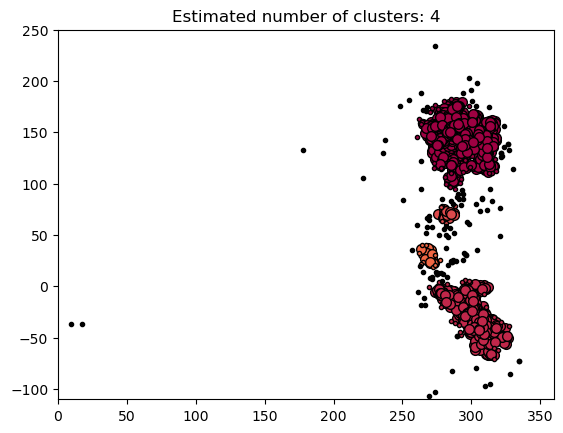

In [250]:
# Plot result
# Black removed and is used for noise instead.

X_PRO = X_PRO.to_numpy()

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_PRO[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = X_PRO[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % (n_clusters_//4))
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()